In [2]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
import statsmodels.api as sm

In [3]:
style.use('ggplot')

In [4]:
start = dt.datetime(2018,1,1)
end = dt.datetime(2019,10,25)

In [5]:
STK = web.DataReader(['FSLR','PEGI','QCLN','^GSPC'],'yahoo',start,end)

STK.tail()

Attributes  Adj Close                                         Close  \
Symbols          FSLR       PEGI       QCLN        ^GSPC       FSLR   
Date                                                                  
2019-10-21  56.340000  26.850000  21.600000  3006.719971  56.340000   
2019-10-22  56.220001  26.799999  21.440001  2995.989990  56.220001   
2019-10-23  55.279999  27.350000  21.340000  3004.520020  55.279999   
2019-10-24  55.889999  27.740000  21.860001  3010.290039  55.889999   
2019-10-25  52.660000  27.740000  22.000000  3022.550049  52.660000   

Attributes                                          High             ...  \
Symbols          PEGI       QCLN        ^GSPC       FSLR       PEGI  ...   
Date                                                                 ...   
2019-10-21  26.850000  21.600000  3006.719971  56.919998  26.940001  ...   
2019-10-22  26.799999  21.440001  2995.989990  56.779999  27.030001  ...   
2019-10-23  27.350000  21.340000  3004.520020  56.759998  27.719999  ...   
2019-10-24  27.740000  21.860001  3010.290039  56.080002  28.100000  ...   
2019-10-25  27.740000  22.000000  3022.550049  55.000000  27.760000  ...   

Attributes        Low                    Open                        \
Symbols          QCLN        ^GSPC       FSLR       PEGI       QCLN   
Date                                                                  
2019-10-21  21.559999  2995.350098  55.590000  26.730000  21.559999   
2019-10-22  21.309999  2995.040039  56.340000  26.940001  21.600000   
2019-10-23  21.309999  2991.209961  55.900002  26.650000  21.309999   
2019-10-24  21.709999  3000.419922  55.610001  27.480000  21.850000   
2019-10-25  21.580000  3001.939941  54.000000  27.660000  21.760000   

Attributes                  Volume                                    
Symbols           ^GSPC       FSLR       PEGI     QCLN         ^GSPC  
Date                                                                  
2019-10-21  2996.479980  1043400.0   624500.0  13900.0  3.271620e+09  
2019-10-22  3010.729980  1198700.0   500900.0   5300.0  3.523890e+09  
2019-10-23  2994.010010  1159200.0  2281500.0   4100.0  3.392870e+09  
2019-10-24  3014.780029  1770800.0  1357700.0  19100.0  3.692600e+09  
2019-10-25  3003.320068  6340100.0  1899100.0  19300.0  3.370370e+09  

[5 rows x 24 columns]

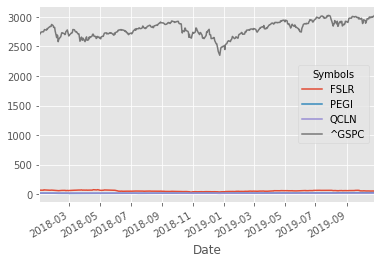

<Figure size 432x288 with 0 Axes>

In [6]:
STK['Adj Close'].plot()
plt.show()
pic = plt.show()
plt.savefig('graph.png')

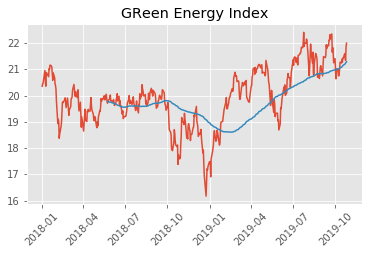

In [7]:
RAND = web.DataReader('QCLN','yahoo',start,end)
RAND['100ma'] = RAND['Adj Close'].rolling(window=100).mean()
ax1 = plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
#ax2 = plt.subplot2grid((6,1),(5,0),rowspan=1,colspan=1)
ax1.plot(RAND.index,RAND['Adj Close'])
ax1.plot(RAND.index,RAND['100ma'])
#ax2.bar(BHGE.index,BHGE['Volume'])
plt.xticks(rotation=45)
plt.title("GReen Energy Index")
plt.show()

In [8]:
STK['Adj Close'].tail()
STK_adj = STK['Adj Close']
STK_adj.to_csv('Stonks.csv')
STK_adj.head()

Symbols,FSLR,PEGI,QCLN,^GSPC
Date,,,,
2018-01-02,70.430000,18.871847,20.358816,2695.810059
2018-01-03,69.800003,18.655327,20.447206,2713.060059
2018-01-04,69.139999,18.663986,20.476669,2723.989990
2018-01-05,69.169998,18.568720,20.604340,2743.149902
2018-01-08,69.620003,18.733273,20.957895,2747.709961


In [9]:
clean_returns = STK['Adj Close'].pct_change(1)
pct_returns = clean_returns.dropna(axis=0)
pct_returns.head()

Symbols,FSLR,PEGI,QCLN,^GSPC
Date,,,,
2018-01-03,-0.008945,-0.011473,0.004342,0.006399
2018-01-04,-0.009456,0.000464,0.001441,0.004029
2018-01-05,0.000434,-0.005104,0.006235,0.007034
2018-01-08,0.006506,0.008862,0.017159,0.001662
2018-01-09,0.005745,-0.008322,-0.020619,0.001303


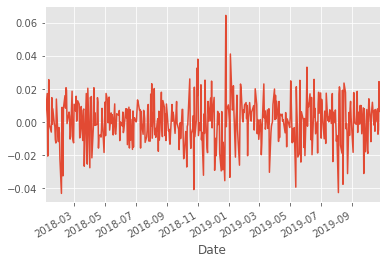

In [11]:
pct_returns['QCLN'].plot()

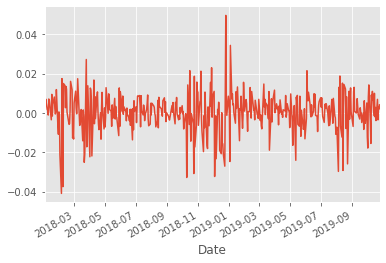

In [12]:
pct_returns['^GSPC'].plot()

In [13]:
#split dependent and independent variables
X = pct_returns['^GSPC']
y = pct_returns['QCLN']
X1 = sm.add_constant(X)

C:\Users\rhaws\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [14]:
#make regression model
model = sm.OLS(y,X1)

In [15]:
# fit model and print results
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   QCLN   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     828.0
Date:                Mon, 11 Nov 2019   Prob (F-statistic):          1.74e-104
Time:                        05:48:03   Log-Likelihood:                 1551.6
No. Observations:                 457   AIC:                            -3099.
Df Residuals:                     455   BIC:                            -3091.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.146e-05      0.000     -0.188      0.8

In [17]:
# alternatively scipy linear regression
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)

print(std_err)

0.03892429442403161
